### Dataset and why it is interesting
       This analysis is about Food, essential for the survival of all living organisms (a very important topic to me and for everyone else). Many of us are privileged to have the luxury to choose the food we want to eat on a daily basis. But there are still people, around the world, that struggle to get a single meal a day.       

    The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:
    Food - refers to the total amount of the food item available as human food during the reference period.
    Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.
   


### Data Wrangling

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("precision",2)

In [29]:
df=pd.read_csv('https://github.com/pinkdragon1000/Food-Production-Analysis/raw/master/FAO.csv',\
               encoding="ISO-8859-1")

In [3]:
df.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.00,21477.00,21477.00,21477.00,21477.00,17938.00,17938.00,17938.00,17938.00,17938.00,...,21128.00,21128.00,21373.00,21373.00,21373.00,21373.00,21373.00,21373.00,21477.00,21477.00
mean,125.45,2694.21,5211.69,20.45,15.79,195.26,200.78,205.46,209.93,217.56,...,486.69,493.15,496.32,508.48,522.84,524.58,535.49,553.40,560.57,575.56
std,72.87,148.97,146.82,24.63,66.01,1864.12,1884.27,1861.17,1862.00,2014.93,...,5001.78,5100.06,5134.82,5298.94,5496.70,5545.94,5721.09,5883.07,6047.95,6218.38
min,1.00,2511.00,5142.00,-40.90,-172.10,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-169.00,-246.00
25%,63.00,2561.00,5142.00,6.43,-11.78,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,120.00,2640.00,5142.00,20.59,19.15,1.00,1.00,1.00,1.00,1.00,...,6.00,6.00,7.00,7.00,7.00,7.00,7.00,8.00,8.00,8.00
75%,188.00,2782.00,5142.00,41.15,46.87,21.00,22.00,23.00,24.00,25.00,...,75.00,77.00,78.00,80.00,82.00,83.00,83.00,86.00,88.00,90.00
max,276.00,2961.00,5521.00,64.96,179.41,112227.00,109130.00,106356.00,104234.00,119378.00,...,360767.00,373694.00,388100.00,402975.00,425537.00,434724.00,451838.00,462696.00,479028.00,489299.00


In [4]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


There are 115 unique food items, 174 unique countries in this dataset

### From the above statistical summary we can understand that,

     There are 21477 entries are in the dataset but in years columns we could see only 17938 entries in some columns which means there are NULL values

    The average values for the year columns is increasing year by year

    The minimum value and 25 percentile value are same for the years 1961-2011 but in the years 2012 and 2013 there are negative values

In [5]:
df.isnull().sum()

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64

In [6]:
#Total number of missing values for Area
values_per_area = df.pivot_table(index=['Area'], aggfunc='size')
data = df[df.isna().any(axis=1)]
df_missing_area = data.pivot_table(index=['Area'], aggfunc='size')
df_missing_area

Area
Armenia                                      133
Azerbaijan                                   124
Belarus                                      131
Belgium                                      136
Bosnia and Herzegovina                       124
Croatia                                      129
Czechia                                      129
Estonia                                      135
Ethiopia                                     116
Georgia                                      133
Kazakhstan                                   141
Kyrgyzstan                                   124
Latvia                                       136
Lithuania                                    140
Luxembourg                                   127
Montenegro                                   118
Oman                                         124
Republic of Moldova                          130
Russian Federation                           137
Serbia                                       127
Slovakia       

    There are missing values in the data pertaining to the newly formed countries such as South Sudan and countries that are formed post 1990(dissolution of the USSR and Yugoslavia in the early 1990s lead to the creation of most of the newly independent states, source: https://www.thoughtco.com/new-countries-of-the-world-1433444) , which do not have food and feed production details dating back to 1961. Hence, details of those countries are missing only upto 1990.

    Let us ignore the data that has missing values due to non-existent countries at that period of time. We are doing this, as we cannot assume values for the countries that are not formed at that time. If the data is not human or machine recorded, we can assume the values according to the mean. But it is not the case here.

In [7]:
dropdf=df.dropna(thresh=62)

In [8]:
#Shape after rows have been dropped.  
dropdf.shape

(17938, 63)

After reviewing further it appears that "Milk - Excluding Butter" is duplicated with a different "Item Code" for the US and for India. To remediate this issue we will drop all rows with "Item Code" == 2848.

In [9]:
dropdf=dropdf.drop(dropdf[dropdf['Item Code']==2848].index)

###  Data Analysis  



In [10]:
dropdf.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


### Top items produced across the world

In [11]:
dropdf.groupby("Item")["Element"].agg("count").sort_values(ascending=False)[:30]

Item
Eggs                          298
Cereals - Excluding Beer      291
Fish, Seafood                 283
Maize and products            278
Pelagic Fish                  275
Oilcrops                      259
Starchy Roots                 255
Cereals, Other                255
Animal fats                   241
Oats                          227
Milk - Excluding Butter       225
Fish, Body Oil                225
Barley and products           223
Wheat and products            218
Rice (Milled Equivalent)      212
Pulses                        210
Oilcrops, Other               209
Vegetables, Other             206
Cassava and products          206
Vegetables                    206
Pulses, Other and products    206
Potatoes and products         201
Fruits - Excluding Wine       188
Marine Fish, Other            186
Roots, Other                  184
Soyabeans                     180
Demersal Fish                 174
Rye and products              173
Sugar & Sweeteners            170
Offals, E

 It looks like, the top items produced across the world are Eggs, Cereals,Fish(SeaFood)


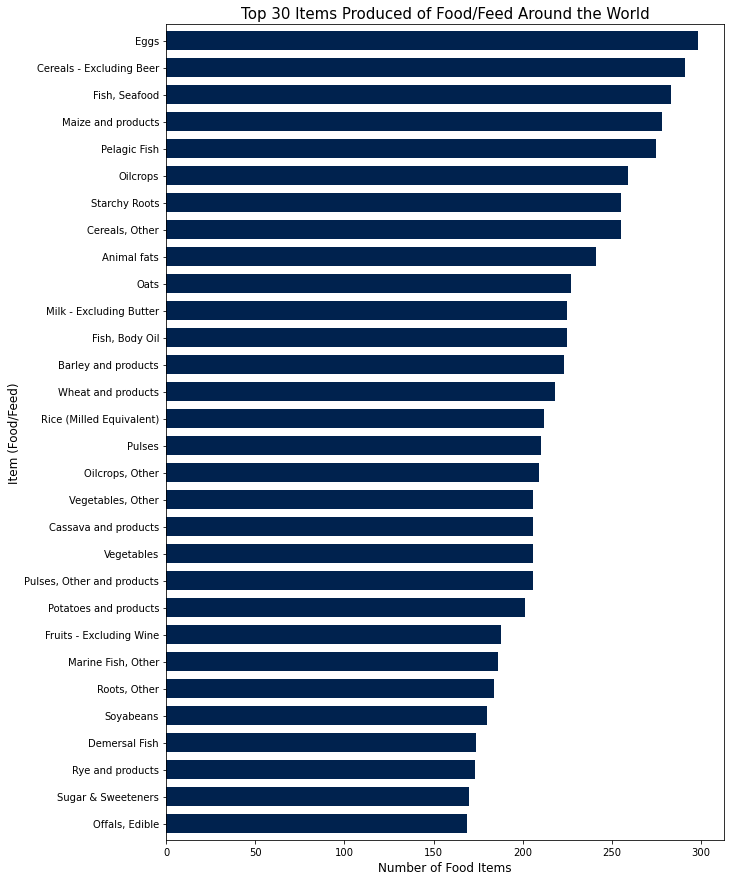

In [12]:
%matplotlib inline
items=pd.DataFrame(dropdf.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:30]
items.plot(kind='barh', figsize=(10,15), width=0.7, cmap = "cividis", legend=False)
plt.gca().invert_yaxis()
plt.title("Top 30 Items Produced of Food/Feed Around the World", fontsize="15")
plt.xlabel("Number of Food Items", fontsize="12")
plt.ylabel("Item (Food/Feed)", fontsize="12")
plt.show()

### Top food producing Countries

#### creating few variables and dataframes, for easier and cleaner analysis

In [13]:
years=[col for col in dropdf if col.startswith('Y')]

In [14]:
top_countries=dropdf.groupby("Area")[years].sum()

In [15]:
top_countries

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8922.0,8851.0,8565.0,9527.0,9767.0,9434.0,10493.0,10674.0,10973.0,9724.0,...,14771.0,15951.0,16688.0,17510.0,17677.0,18917.0,19230.0,19310.0,20690,20983
Albania,1540.0,1580.0,1592.0,1708.0,1698.0,1803.0,1847.0,1970.0,2025.0,2178.0,...,5623.0,5690.0,5862.0,5775.0,6174.0,6322.0,6891.0,7065.0,7174,7206
Algeria,6965.0,6739.0,6418.0,6770.0,7002.0,6978.0,7403.0,8156.0,8292.0,8664.0,...,44655.0,45552.0,46874.0,45665.0,46607.0,52676.0,55149.0,60150.0,63763,66612
Angola,4705.0,4647.0,5101.0,5142.0,5382.0,5531.0,5678.0,5537.0,6063.0,6300.0,...,25297.0,26442.0,28033.0,29654.0,31831.0,36790.0,38183.0,40346.0,37802,48373
Antigua and Barbuda,86.0,89.0,100.0,90.0,79.0,69.0,59.0,54.0,62.0,71.0,...,84.0,104.0,101.0,111.0,104.0,103.0,104.0,106.0,102,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),8601.0,8451.0,8837.0,9534.0,9698.0,9857.0,10228.0,11052.0,11483.0,12408.0,...,31553.0,31598.0,33200.0,37148.0,39625.0,39922.0,40797.0,41663.0,40787,41880
Viet Nam,23791.0,25153.0,25970.0,26270.0,26856.0,27117.0,27622.0,28541.0,29367.0,30587.0,...,94685.0,97445.0,98847.0,103266.0,103827.0,106711.0,112207.0,111391.0,124013,126611
Yemen,2849.0,2900.0,3006.0,3075.0,3168.0,3203.0,3251.0,3281.0,3240.0,3226.0,...,12735.0,13297.0,14092.0,15215.0,15389.0,16143.0,16270.0,16236.0,17321,17672


In [16]:
# aggregating to get average production for each country  
top_allyears=pd.DataFrame(top_countries.agg("mean",axis=1).sort_values(ascending=False),columns=["Tons"])

In [17]:
top_allyears.head()

,Tons
Area,
"China, mainland",1.43e+06
United States of America,7.23e+05
India,6.35e+05
Brazil,2.45e+05
Germany,2.08e+05


In [18]:
top_30 = top_allyears[:30]

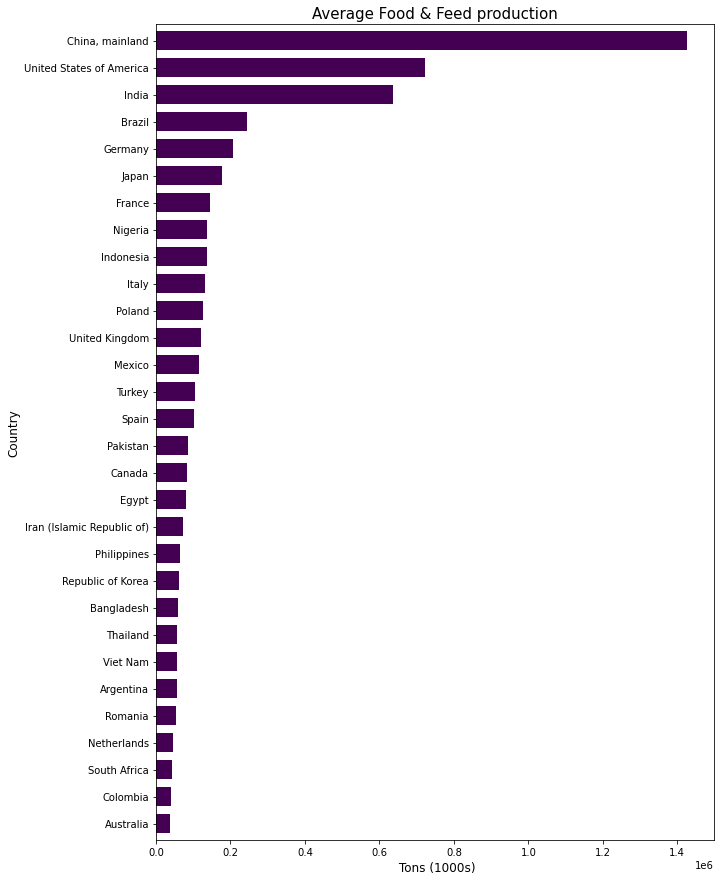

In [19]:
#plotting the average produce of each country
top_30.plot(kind="barh", width=0.7, cmap = "viridis", figsize=(10,15), legend=False)
plt.gca().invert_yaxis()
plt.title("Average Food & Feed production", fontsize="15")
plt.xlabel(" Tons (1000s)", fontsize="12")
plt.ylabel("Country", fontsize="12")
plt.show()

Looks like China produced the most amount of food and feed in 1000s of tons. In the top 30 countries, South Africa provided the least.
Looking at the graph, we can understand that there is a large disparity in production of China and South Africa. Several factors like population, Climatic conditions, economic conditions might have effected the production


### Measures of Central Tendency and Variability

In [20]:
import statistics
import math

def stats_of_list(values):
    """
    Compute and return a tuple of the mean, population variance, 
    and population standarard deviation of a list of values.
    @param values the list of values.
    @return a tuple of the mean, variance, and standard deviation.
    """
    
    sum_of_squares = 0
    mean = statistics.mean(values)
    
    for x in values:
        diff = x - mean
        sum_of_squares += diff*diff
       
    variance = sum_of_squares/len(values)
    stdev = math.sqrt(variance)
    
    return (mean, variance, stdev)

In [21]:
x_mean, x_variance, x_stdev = stats_of_list(top_allyears.Tons)

print(f'              mean = {x_mean:.2f}')
print(f'          variance = {x_variance:.2f}')
print(f'standard deviation = {x_stdev:.2f}')

              mean = 43899.17
          variance = 20765307151.22
standard deviation = 144101.73


   From the above analysis,
    The mean Total Produce per each country is at 43900 tons.
    The standard deviation is almost 4 times the mean. The deviation from mean produce is quite high, stating there are quite few countries with huge population and the necessity to produce quite high quantites of food&feed elements.

#### Boxplot for Total Production

In [22]:
top_countries_sorted=top_countries.sort_values(by=['Y2013'], ascending=False)

Text(0.5, 0, 'Country')

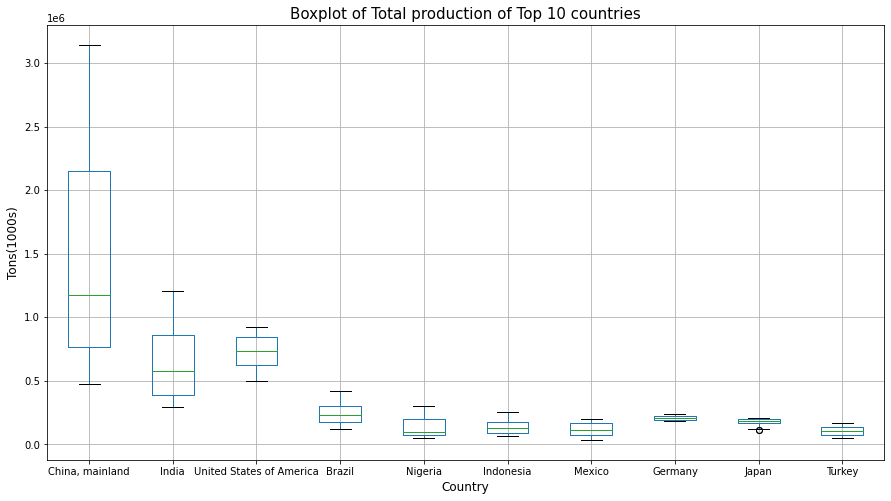

In [23]:
#Box plot to show the total produce over the years for the top 10 countries
top_box = top_countries_sorted[:10].T.boxplot(figsize=(15,8))
plt.title("Boxplot of Total production of Top 10 countries", fontsize="15")
plt.ylabel("Tons(1000s)", fontsize="12")
plt.xlabel("Country", fontsize="12")

The box plot shows the distribution of data with the total production for each country over the years. The green line represents the median, dividing the data to 2 equal parts. Higher production values on the top of the line and lower production values below the line.
  

#### Box plot of Top Items produced

In [24]:
top_food=dropdf.groupby("Item")[years].sum()
top_food_sorted=top_food.sort_values(by=['Y2013'],ascending=False)

In [25]:
top_food_sorted.T.describe()

Item,Cereals - Excluding Beer,Vegetables,"Vegetables, Other",Maize and products,Milk - Excluding Butter,Starchy Roots,Fruits - Excluding Wine,Wheat and products,Rice (Milled Equivalent),Meat,...,Ricebran Oil,Miscellaneous,Infant food,Sesameseed Oil,"Fish, Body Oil",Pepper,Cloves,"Fish, Liver Oil",Palm kernels,"Meat, Aquatic Mammals"
count,5.30e+01,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.0,53.00,53.00,53.00,53.00,53.0
mean,1.17e+06,439086.74,347689.00,368679.57,391391.55,404470.00,264616.79,332398.98,272427.68,151049.40,...,413.55,206.89,206.89,524.09,631.0,201.91,17.15,22.53,7.47,0.0
std,3.32e+05,254684.55,202377.34,130442.08,107584.13,72417.23,119917.34,117908.89,85208.93,66718.77,...,258.65,164.16,164.16,103.09,121.7,112.68,12.75,16.55,3.53,0.0
min,5.89e+05,177356.00,142942.00,168039.00,250493.00,282832.00,109963.00,138829.00,122700.00,59002.00,...,70.00,13.00,13.00,355.00,452.0,53.00,3.00,6.00,3.00,0.0
25%,8.82e+05,220476.00,172348.00,261893.00,293768.00,357727.00,164575.00,217451.00,195967.00,92733.00,...,194.00,114.00,114.00,429.00,530.0,108.00,7.00,10.00,6.00,0.0
50%,1.18e+06,354460.00,280628.00,344875.00,380202.00,381941.00,236186.00,354596.00,280670.00,137101.00,...,315.00,173.00,173.00,510.00,592.0,168.00,12.00,14.00,7.00,0.0
75%,1.47e+06,670998.00,539515.00,484942.00,461132.00,478885.00,356583.00,442190.00,348262.00,209724.00,...,636.00,257.00,257.00,613.00,734.0,267.00,26.00,41.00,9.00,0.0
max,1.75e+06,971615.00,768458.00,632847.00,619401.00,557021.00,517523.00,515473.00,408832.00,279446.00,...,924.00,689.00,689.00,717.00,921.0,412.00,46.00,55.00,26.00,0.0


Text(0.5, 0, 'Food/Feed Items')

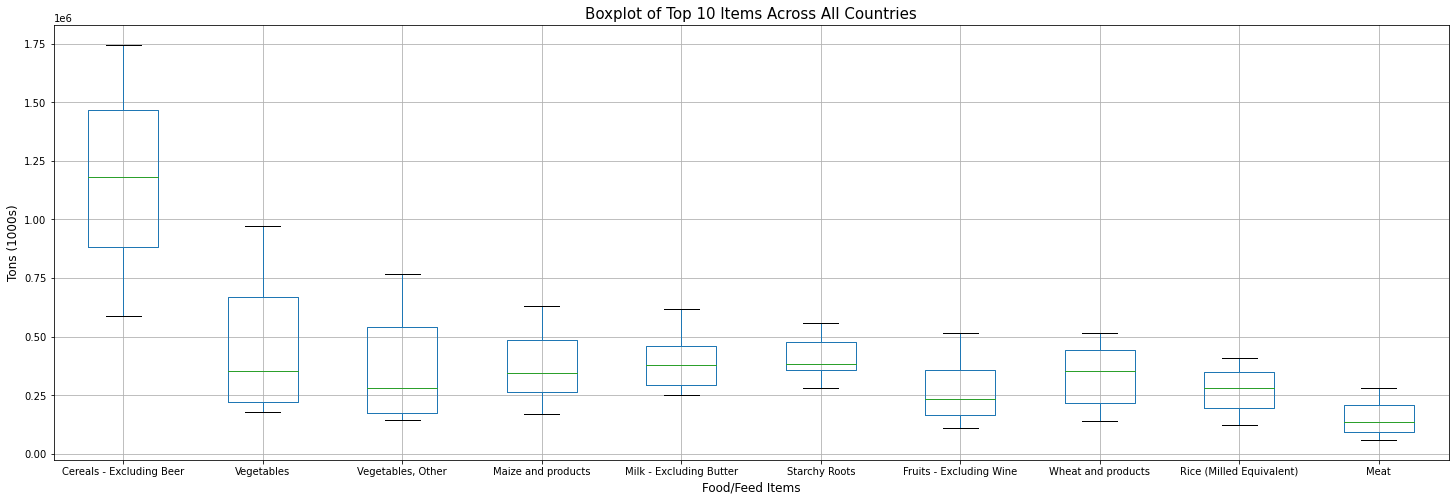

In [26]:
top_food_sorted[:10].T.boxplot(figsize=(25,8))
plt.title("Boxplot of Top 10 Items Across All Countries", fontsize="15")
plt.ylabel("Tons (1000s)", fontsize="12")
plt.xlabel("Food/Feed Items", fontsize="12")

The above plot shows the top items produced among all countries for all years. Median being the green line, shows the data distribution of each item.


Text(0, 0.5, 'Year')

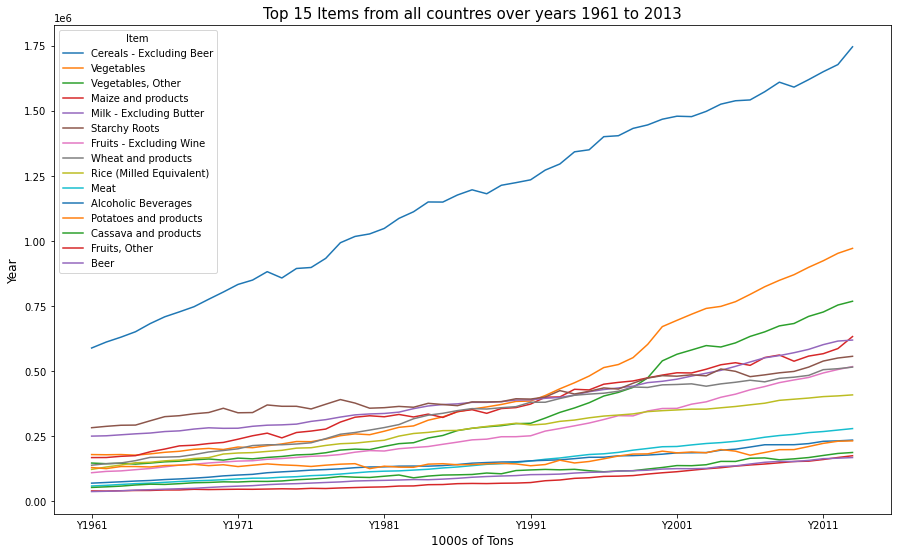

In [27]:
top_food_sorted[:15].T.plot(figsize=(15,9))
plt.title("Top 15 Items from all countres over years 1961 to 2013", fontsize=15)
plt.xlabel("1000s of Tons", fontsize=12)
plt.ylabel("Year", fontsize=12)

Looks like, the production of cereals have drastically increased from 1961 to 2013. It might denote that the consumption has increased as western coutries adapted breakfast - cereal as their staple. Starchy Roots are still popular, slowy increasing in production, might represent the effect growing population 

#### Before you did the analysis, what did you hope to discover?
    Food is taken differently in different countries and societies. If meat is consumed more in one country, there are countries that consume less. Does the production of food depend on the consumption of the people living in the country?


#### What was your overall approach to analysis?
    This analysis is purely exploratory. We wanted to understand a pattern in the production over the years. Has certain items became immensely popular over a period of time? We all know population has been increasing. 

#### What insights did you discover from your analysis? Will it support good decision-making?
    As we dived into the dataset and started exploring it, we had few insights.
        1. Just relying on one dataset, doesnot answer questions.
        2. We identified, for better decision-making, we need to consider many inter-linked ideas and data.
        3. For example, can we assume, since China has highest population, automatically produces more food? Does producing food always mean for the people living in the country?
        4. In certain cases, countries produce food majorly to export. The population, and the demand in it's own country does not define it's decision of producing more/less.


It is estimated that the world population is expected to grow from 7.3 billion today to 9.7 billion by 2050.According to World Bank, the world needs to produce atleast 50% more food to feed 10 billion people by 2050. Climate change, depleting land, water and other natural resources; is a huge concern.

It is essential to find solutions to feed this growing population; and agriculture organizations, entrepreneurs , governments have been working towards this enormous task. There has been research and solutions on changing the way we grow food and also the way we eat. To make things harder, there are certain social, political and climatic issues that are affecting and are affected by the way we grow food.

It is crucial, to find solutions for world's hunger problems, as rise in population, disease, wars disturbing the social balance.